In [3]:
# Step 1: Import KaggleHub and download the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\ishav\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [4]:
# Step 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 3: Load the CSV file
csv_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(csv_path)

# Step 4: Display basic info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSample Data:\n", df.head())


Shape of dataset: (7043, 21)

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contrac

C:\Users\ishav\AppData\Local\Temp\ipykernel_11208\229905691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


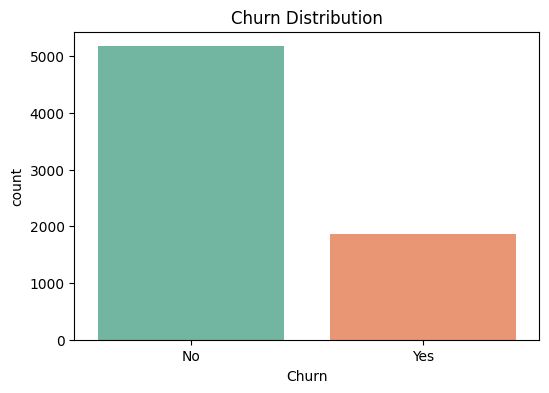

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [5]:
# Step 5: Check churn balance
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Churn Distribution")
plt.savefig("../notebooks/eda_plots/churn_distribution.png")
plt.show()

print(df['Churn'].value_counts(normalize=True))


C:\Users\ishav\AppData\Local\Temp\ipykernel_11208\4139017665.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
C:\Users\ishav\AppData\Local\Temp\ipykernel_11208\4139017665.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='pastel')


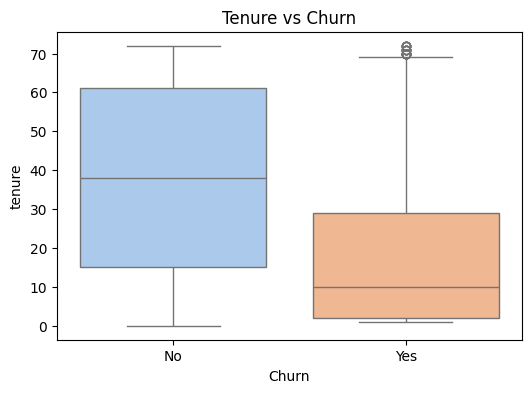

C:\Users\ishav\AppData\Local\Temp\ipykernel_11208\4139017665.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


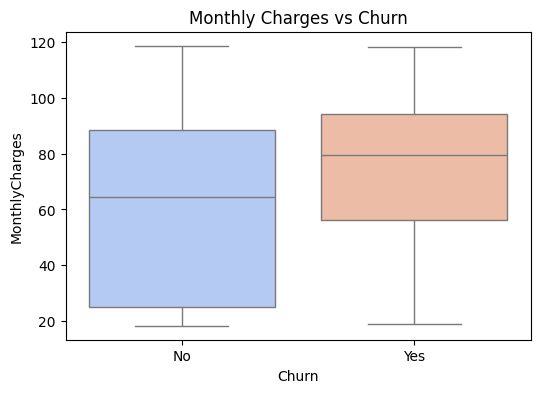

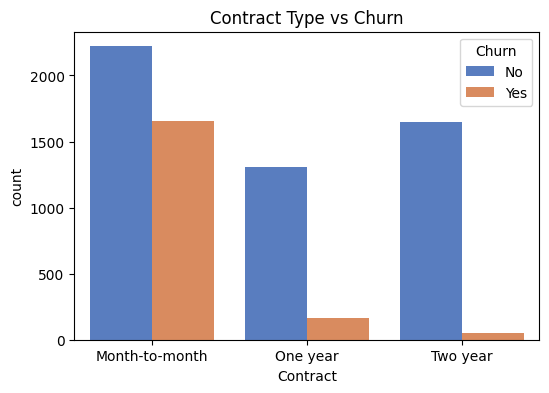

In [6]:
# Step 6: Convert TotalCharges to numeric (some rows are blank)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Step 7: Visualize churn vs tenure
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df, palette='pastel')
plt.title('Tenure vs Churn')
plt.savefig("../notebooks/eda_plots/tenure_vs_churn.png")
plt.show()

# Step 8: Visualize churn vs monthly charges
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.savefig("../notebooks/eda_plots/monthlycharges_vs_churn.png")
plt.show()

# Step 9: Visualize churn vs contract type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='muted')
plt.title('Contract Type vs Churn')
plt.savefig("../notebooks/eda_plots/contract_vs_churn.png")
plt.show()


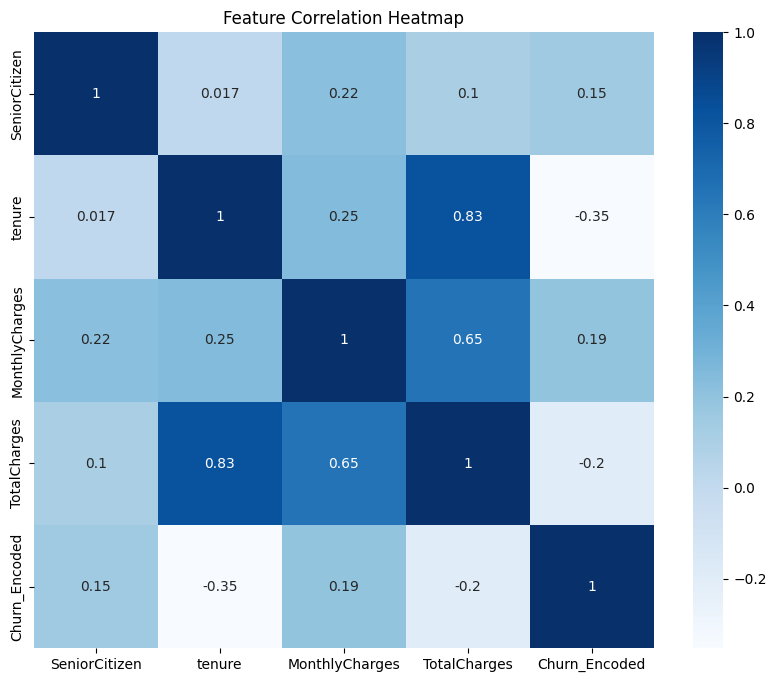

In [7]:
# Step 10: Encode categorical churn variable
df['Churn_Encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.savefig("../notebooks/eda_plots/correlation_heatmap.png")
plt.show()


In [8]:
# Step 11: Save processed data
os.makedirs("../data", exist_ok=True)
df.to_csv("../data/cleaned_churn_data.csv", index=False)
print("Cleaned data saved to /data/cleaned_churn_data.csv")


Cleaned data saved to /data/cleaned_churn_data.csv
